## <font color ="#fa8231">Proyecto final: Prediccion de costo de consumo total por cliente

## <font color ="#fa8231">Instrucciones por fase

1. Datos y planteamiento
2. Análisis exploratorio
3. Modelado predictivo

### <font color ="#fa8231"> 1.- Datos y planteamiento

En esta fase del proyecto deberás realizar una presentación/documento/diagrama que contenga lo siguiente:
* **Descripción del dataset**
    - Qué datos representa, de dónde lo obtuviste
* **Motivación**
    - Por qué este dataset?
    - DATASET TIENE MUCHA APLICABILIDAD, ES INTUITIVO E INTERESANTE
* **Conocimiento de dominio**
    - Si aplica, qué relación tienes con el dominio del dataset? Has trabajado con datos similares antes?
* <font color ='indianred'> **Meta** </font>  
    - Define qué vas a hacer con el dataset, tienes 3 opciones:
        - **Predicción** (regresión o clasificación usando sklearn o tensorflow)
    - Explica por qué escogiste una de las 3 actividades y explica por qué tu resultado va a ser valioso
    
    
    - COLUMNA PARA PREDECIR: "mnt_wines"
    - METODO: REGRESION LINEAL 

###  <font color ="#fa8231"> 2.- Análisis exploratorio

En esta fase deberás de presentar una libreta que muestre los siguientes pasos:
* **Vistazos de los datos(P1)**
    - Presenta de la manera más clara que puedas las generalidades del dataset (número de renglones y columnas, tipos de datos, etc...)
* **Limpieza de datos(P1)**
    - Había nulos? Había columnas innecesarias? Había información redundante? Qué hiciste con estos datos? Por qué decidiste manejarlos como los hayas manejado?
* **Corrección de fechas(P1)**
    - Si tu dataset contiene fechas, convierte la columna que contenga las fechas a un objeto datetime
* **Extracción de columnas interesantes(P1,P2)**
    - Presenta la menor cantidad posible de columnas que *tú* consideres son las más relevantes a la actividad que seleccionaste
* **Exploración de columnas interesantes(P2)**
    - Justifica tu intuición con visualizaciones en seaborn y estadísticas descriptivas. Demuestra que las variables que seleccionaste como interesantes tienen potencial para resolver la actividad

###  <font color ="#fa8231"> Contexto del dataset y diccionario de datos

**Context**
 **Problem Statement**
 
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
 
 **Content**
 **Attributes**
 
 **People**
 
 - ID: Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if customer complained in the last 2 years, 0 otherwise
 
 
 **Products**
 
 
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years
 
 
 **Promotion**
 
 
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
 
 
 **Medio de compra**
 
 
 - NumWebPurchases: Number of purchases made through the company’s web site
 - NumCatalogPurchases: Number of purchases made using a catalogue
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s web site in the last month
 
  **Data Source: https://www.kaggle.com/imakash3011/customer-personality-analysis**

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(["ggplot","seaborn-white"])

# Librerias adicionales
from base_code.describe_df import data_description
from base_code.explore import remove_outliers
#from base_code.feature_selection import variable_normalization,select_kbest
from base_code.modeling import manual_model,final_model,linear_regression,random_forest_regressor

# Librerias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn import metrics

# Selección de modelos
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [2]:
# Crear dataframe y describir datos de entrada
df = data_description("data/marketing_campaign.csv","\t")


****** Rename Columns: ******

Original column names:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Renamed column names:
 Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accep

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
2228,8720,1978,2n Cycle,Together,NaN,0,0,12-08-2012,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0



****** Describe: ******



,education,marital_status,dt_customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



****** Nulls by column: ******

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_costcontact             0
z_revenue                 0
response                  0
dtype: int64

****** Info: ******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column  

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response



****** Columns correlation: ******



,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
id,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
year_birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
mnt_wines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
mnt_fruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
mnt_meat_products,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
mnt_fish_products,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331



****** Total unique values by column: ******

Number of unique values for column id:  2240 | Percent = 100.0%
Number of unique values for column year_birth:  59 | Percent = 2.63%
Number of unique values for column education:  5 | Percent = 0.22%
Number of unique values for column marital_status:  8 | Percent = 0.36%
Number of unique values for column income:  1974 | Percent = 88.12%
Number of unique values for column kidhome:  3 | Percent = 0.13%
Number of unique values for column teenhome:  3 | Percent = 0.13%
Number of unique values for column dt_customer:  663 | Percent = 29.6%
Number of unique values for column recency:  100 | Percent = 4.46%
Number of unique values for column mnt_wines:  776 | Percent = 34.64%
Number of unique values for column mnt_fruits:  158 | Percent = 7.05%
Number of unique values for column mnt_meat_products:  558 | Percent = 24.91%
Number of unique values for column mnt_fish_products:  182 | Percent = 8.12%
Number of unique values for column mnt_sweet_prod

In [3]:
# Eliminar nulos
df.dropna(inplace=True)

In [4]:
# Remover generaciones Z y Silence 
limites = [0, 1964, 1980, 'inf']
etiquetas = ['Baby Boomers', 'Generation X', 'Millenials']
pd.cut(x = df['year_birth'], bins = limites, labels = etiquetas)
df['generation'] = pd.cut(x = df['year_birth'], bins = limites, labels = etiquetas)
df.generation.value_counts()

Generation X    1061
Baby Boomers     775
Millenials       380
Name: generation, dtype: int64

In [5]:
# Crear variable para la edad de nuestros clientes.
current_date = datetime.datetime.now()
date = current_date.date()
df["client_age"] = date.year - df["year_birth"]

In [6]:
# Eliminar outliers par la variable "client_age"
df = remove_outliers(df,"client_age")
df["client_age"].describe()

count    2213.000000
mean       52.082693
std        11.700216
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: client_age, dtype: float64

In [7]:
# Eliminar outliers par la variable "income"
df = remove_outliers(df,"income")
df["income"].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: income, dtype: float64

In [8]:
# Eliminar outliers par la variable "mnt_wines"
df = remove_outliers(df,"mnt_wines")
df["mnt_wines"].describe()

count    2171.000000
mean      289.896361
std       313.677478
min         0.000000
25%        23.000000
50%       172.000000
75%       489.500000
max      1230.000000
Name: mnt_wines, dtype: float64

In [9]:
# Crear variable "children"
df["children"] = df["kidhome"] + df["teenhome"]
df["children"] = df["children"].apply(lambda value: 1 if value != 0 else 0)
#df.children.head(9)

In [10]:
# Crear variable "total_children"
df["total_children"] = df["kidhome"] + df["teenhome"]

In [11]:
print(df.shape)

(2171, 33)


### <font color ="#fa8231">3.- Modelado predictivo

* **Específica claramente cuál es la variable que vas a predecir y cuáles son sus predictores**
    - Puedes usar tantas variables como desees... pero deberás poder justificar su inclusión en el modelo
    - USAR SELECTKBEST PARA COMPARAR CON EL METODO MANUAL LAS MEJORES VARIABLES A UTILIZAR
    - modelo_manual = "mtn_wines ~ income + client_age + children"
    - VARIABLE A PREDECIR: "mtn_wines" 
    - PREDICTORES: "income"  "client_age" "children"

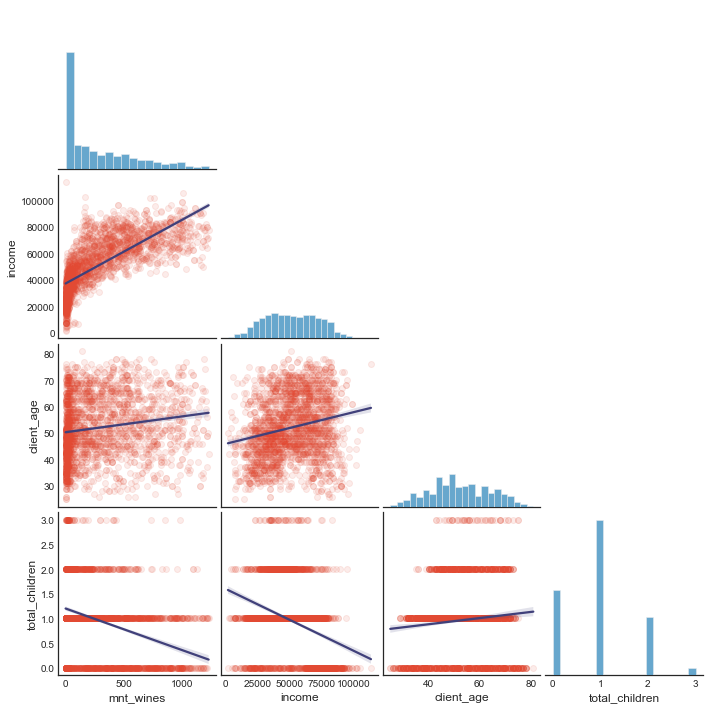

In [12]:
# Crear grafico para variables seleccionadas
# mnt_wines mnt_meat_products | children total_children
cols_traditional_model = ["mnt_wines","income","client_age","total_children"]
#cols_traditional_model = ["mnt_meat_products","income","children"]
df_traditional_model = df[cols_traditional_model]
sns.pairplot(data=df_traditional_model,corner=True,kind="reg",plot_kws={"line_kws":{'color':"#40407a"},"scatter_kws":{"alpha":0.1}});  

Coeficiente de correlación de Pearson y p-value (0.7336162195155077, 0.0)


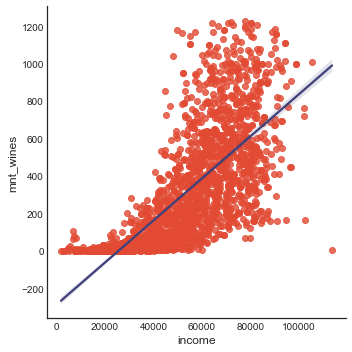

In [13]:
x1 = cols_traditional_model[1]
y = cols_traditional_model[0]
sns.lmplot(x=x1,y=y,data=df,line_kws={"color":"#40407a"});
print("Coeficiente de correlación de Pearson y p-value",st.pearsonr(df[x1],df[y]))

Coeficiente de correlación de Pearson y p-value (0.1605534779672005, 5.2564478500484194e-14)


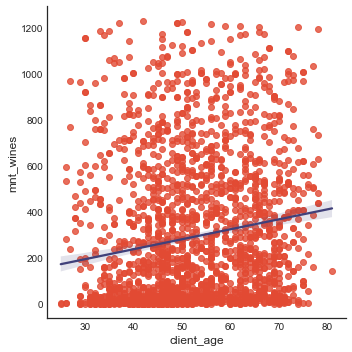

In [14]:
x2 = cols_traditional_model[2]
sns.lmplot(x=x2,y=y,data=df,line_kws={"color":"#40407a"});
print("Coeficiente de correlación de Pearson y p-value",st.pearsonr(df[x2],df[y]))

Coeficiente de correlación de Pearson y p-value (-0.35275081792721363, 1.252156074145493e-64)


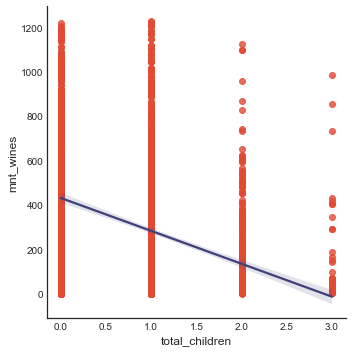

In [15]:
x3 = cols_traditional_model[3]
sns.lmplot(x=x3,y=y,data=df,line_kws={"color":"#40407a"});
print("Coeficiente de correlación de Pearson y p-value",st.pearsonr(df[x3],df[y]))

**Coeficiente de correlación de Pearson**
+ Grado de linealidad
+ $0$: no hay relación lineal
+ $1$: relación lineal perfecta
+ $-1$: relación lineal inversa perfecta

**p-value**
+ significancia de la linealidad
+ Si $p-value<0.05$, entonces podemos decir que el modelo de regresión es significativo



=> **Seleccion de variables predictoras(x) y target(y) de acuerdo a EDA**


In [16]:
# Variables predictoras
x = df_traditional_model[cols_traditional_model[1:]]
# Variable target
y = df_traditional_model[cols_traditional_model[0]]


* **Crea un train y un test set**


In [17]:
# Dividimos en conjunto de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape) # <=== This is going to be used at the end of the process after final model has been selected
print('y_test',y_test.shape) # <=== This is going to be used at the end of the process after final model has been selected

x_train (1736, 3)
y_train (1736,)
x_test (435, 3)
y_test (435,)


In [18]:
# El conjunto de entrenamiento lo dividimos en conjunto de entrenamiento y conjunto de validación
x_train_final, x_validation, y_train_final, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 3)
print('x_train_final',x_train_final.shape)
print('y_train_final',y_train_final.shape)
print('x_validation',x_validation.shape)
print('y_validation',y_validation.shape)

x_train_final (1388, 3)
y_train_final (1388,)
x_validation (348, 3)
y_validation (348,)


* **Preprocesa**
    - Si es una variable cualitativa usa onehot encoding o cualquier método de tu agrado, explica por qué es necesario preprocesar estas variables diferente a las cuantitativa
    - Si es una variable cuantitativa deberás estandarizar la variable utilizando el método de tu agrado, explica por qué es necesario/recomendado estandarizar variables

* **Especifíca qué modelo vas a utlizar**
    - Justifica por qué vas a usar ese modelo en particular y no otro
    - Para nuestro caso de uso necesitamos un modelo que nos ayude a predecir el consumo en           costo del vino. Por lo tanto necesitamos un modelo para regresion lineal. Vamos a               explorar los siguientes modelos: Linear Regression y Random Forest Regressor


* **Entrena tu modelo y realiza optimización de hiperparámetros con GridSearchCV**
    - Explica por qué es necesario hacer validación cruzada para encontrar los mejores hiperparámetros
    - Explica por qué es necesario optimizar los hiperparámetros
    - Describe claramente qué hace cada hiperparámetro que haya seleccionado y por qué lo seleccionaste
    - Interpreta los resultados de la validación cruzada y asegurate de que tu modelo no esté sobreajustado


* **Muestra e interpreta las métricas de desempeño de tu modelo**


In [19]:
df_manual_model,coef,intercept,model_LR = manual_model(x_train_final,y_train_final,x_validation,y_validation)
df_manual_model

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Model,Columns,r2 Train,r2 Validate,RMSE Train,RMSE Validate
0,Linear Regression,"['income', 'client_age', 'total_children']",0.557505,-3.176405,209.535234,609.548792
1,Random Forest Regressor,"['income', 'client_age', 'total_children']",0.937251,0.509533,78.905644,208.887353


In [20]:
print(coef)
print(intercept)
print(model_LR)

[ 1.02882867e-02  1.64512175e+00 -5.72619875e+01]
-263.99293156076214
LinearRegression()


Modelo simple split

¿En regresión múltiple, qué signfica el score (coeficiente de determinación)?

Significa que 62% de la variación del consumo de vinos/carnes puede explicarse a través de las variables de entrada que utilizamos

Entrenar el modelo para usar cross validation

In [21]:
# Algoritmo: Linear Regression
LR_model_CV = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("LR",LinearRegression())])
#LR_model_CV.fit(x_train,y_train)
print(type(LR_model_CV))

<class 'sklearn.pipeline.Pipeline'>


In [22]:
# Monitoreando dos metricas o mas
LR1 = cross_validate(LR_model_CV,x_train,y_train,cv=5,scoring=["r2","neg_root_mean_squared_error"])

In [23]:
df_cv = pd.DataFrame(LR1)
df_cv["LR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["LR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,LR_r2_avg,LR_RMSE_avg
2,0.006872,0.003115,0.532885,-220.729881,0.547826,-209.222003
1,0.004439,0.002803,0.557134,-217.729414,0.547826,-209.222003
0,0.005996,0.001962,0.551764,-210.686268,0.547826,-209.222003
3,0.004516,0.003541,0.523281,-204.032400,0.547826,-209.222003
4,0.005855,0.002729,0.574067,-192.932052,0.547826,-209.222003


Evaluar el modelo

In [24]:
print("Linear Regression con validacion cruzada\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada

Diferencia de R2:  0.050785944089674184
Diferencia de RMSE:  27.797828416665368


In [25]:
LR2 = cross_validate(LR_model_CV,x_train,y_train,scoring=['r2','neg_root_mean_squared_error'], cv=ShuffleSplit(5))

In [26]:
df_cv = pd.DataFrame(LR2)
df_cv["LR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["LR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,LR_r2_avg,LR_RMSE_avg
2,0.005463,0.002374,0.514062,-230.808144,0.539969,-212.104181
0,0.010803,0.003525,0.556449,-218.968960,0.539969,-212.104181
1,0.007096,0.002564,0.524830,-204.313425,0.539969,-212.104181
4,0.004776,0.003183,0.538741,-203.946856,0.539969,-212.104181
3,0.004678,0.002609,0.565762,-202.483520,0.539969,-212.104181


In [27]:
print("Linear Regression con validacion cruzada con grupos aleatorios\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada con grupos aleatorios

Diferencia de R2:  0.051699849147732735
Diferencia de RMSE:  28.324623862757022


In [28]:
# Algoritmo: Random Forest Regressor
RFR_model_CV = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("RFR",RandomForestRegressor())])
#RFR_model_CV.fit(x_train,y_train)
print(type(RFR_model_CV))

<class 'sklearn.pipeline.Pipeline'>


In [29]:
# Monitoreando dos metricas o mas
RFR1 = cross_validate(RFR_model_CV,x_train,y_train,cv=5,scoring=["r2","neg_root_mean_squared_error"])

In [30]:
df_cv = pd.DataFrame(RFR1)
df_cv["RFR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["RFR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,RFR_r2_avg,RFR_RMSE_avg
0,0.356309,0.019330,0.535414,-214.494350,0.553124,-207.709956
2,0.355375,0.015229,0.569260,-211.961434,0.553124,-207.709956
1,0.396170,0.019206,0.597093,-207.674651,0.553124,-207.709956
3,0.304750,0.015490,0.527152,-203.202394,0.553124,-207.709956
4,0.306349,0.015242,0.536701,-201.216952,0.553124,-207.709956


In [31]:
print("Linear Regression con validacion cruzada\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada

Diferencia de R2:  0.06994142581972318
Diferencia de RMSE:  13.277397927352297


In [32]:
RFR2 = cross_validate(RFR_model_CV,x_train,y_train,scoring=['r2','neg_root_mean_squared_error'], cv=ShuffleSplit(5))

In [33]:
df_cv = pd.DataFrame(RFR2)
df_cv["RFR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["RFR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,RFR_r2_avg,RFR_RMSE_avg
0,0.354650,0.015294,0.515052,-242.071023,0.550961,-214.359423
3,0.334517,0.013029,0.534798,-224.090295,0.550961,-214.359423
1,0.344187,0.015254,0.447094,-222.618479,0.550961,-214.359423
2,0.357694,0.014291,0.648813,-193.303377,0.550961,-214.359423
4,0.345810,0.015244,0.609048,-189.713941,0.550961,-214.359423


In [34]:
print("Linear Regression con validacion cruzada con grupos aleatorios\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada con grupos aleatorios

Diferencia de R2:  0.20171904140694896
Diferencia de RMSE:  52.35708169988064


## Multi-modelo usando validacion cruzada y GridSearchCV

In [35]:
# Algoritmo: LinearRegression
multi_model = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("model",LinearRegression())])
print(type(multi_model))

<class 'sklearn.pipeline.Pipeline'>


In [36]:
multi_model.named_steps["model"]

LinearRegression()

In [37]:
#Algoritmos: Linear Regression, Logistic Regression, KNeighborsRegressor and DecisionTreeRegressor.
param_grid = [{"model":[LinearRegression()],
               "model__fit_intercept":[True,False],
               "model__copy_X":[True]},
              {"model":[RandomForestRegressor()],
               "model__max_depth":[1,2,3,4,5,6],
               "model__max_samples":np.linspace(0.01,1,10),
               "model__bootstrap":[True]},
              {"model":[KNeighborsRegressor()],
               "model__n_neighbors":[1,2,3,4,5,6],
               "model__algorithm":["auto","ball_tree","kd_tree","brute"],
               "model__leaf_size":[30,60,90]},
              {"model":[DecisionTreeRegressor()],
               "model__criterion":["squared_error","absolute_error"],
               "model__splitter":["best","random"],
               "model__max_depth":[1,2,3,4,5,6]}]

In [38]:
# Instrucciones
grid_search_cv = GridSearchCV(estimator = multi_model,
                  param_grid = param_grid,
                  cv = 5,
                  scoring="neg_root_mean_squared_error")

In [39]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()],
                          'model__copy_X': [True],
                          'model__fit_intercept': [True, False]},
                         {'model': [RandomForestRegressor(max_depth=4,
                                                          max_samples=0.67)],
                          'model__bootstrap': [True],
                          'model__max_depth': [1, 2, 3, 4, 5, 6],
                          'model__max_samples': ar...
                         {'model': [KNeighborsRegressor()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__leaf_size': [30, 60, 90],
                          'model__n_neighbors': [1, 2, 3, 4, 5, 6]},
                  

In [40]:
# Revisar tipo de objecto
type(grid_search_cv)

sklearn.model_selection._search.GridSearchCV

In [41]:
results = pd.DataFrame(grid_search_cv.cv_results_).sort_values(by='rank_test_score')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__copy_X,param_model__fit_intercept,param_model__bootstrap,param_model__max_depth,param_model__max_samples,...,param_model__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
38,0.411745,0.070214,0.022273,0.007354,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,4,0.67,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-201.117804,-207.929913,-211.088117,-198.327367,-181.278830,-199.948406,10.395633,1
61,0.292894,0.080866,0.019659,0.008889,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,6,1.0,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-205.308154,-206.878648,-207.227330,-197.538378,-182.804983,-199.951499,9.267610,2
49,0.314428,0.088448,0.019930,0.004854,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,5,0.78,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-202.884287,-207.538052,-208.639732,-198.341436,-182.380210,-199.956743,9.518244,3
59,0.328768,0.086704,0.020989,0.004439,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,6,0.78,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-204.640095,-207.395127,-207.251004,-198.462844,-182.353300,-200.020474,9.408105,4
54,0.181268,0.011598,0.014511,0.002303,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,6,0.23,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-202.497602,-207.931875,-210.063052,-196.937259,-182.739078,-200.033773,9.774782,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.010562,0.001790,0.008133,0.006339,KNeighborsRegressor(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': KNeighborsRegressor(), 'model__algor...",-270.986979,-259.366725,-255.152624,-247.732414,-289.125253,-264.472799,14.445457,151
110,0.012069,0.004344,0.008010,0.001516,KNeighborsRegressor(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': KNeighborsRegressor(), 'model__algor...",-270.986979,-259.366725,-255.152624,-247.732414,-289.125253,-264.472799,14.445457,151
147,0.012770,0.001539,0.002494,0.000362,DecisionTreeRegressor(),NaN,NaN,NaN,1,NaN,...,random,"{'model': DecisionTreeRegressor(), 'model__cri...",-275.464962,-244.113027,-325.336297,-296.474029,-314.972987,-291.272261,29.062021,156
135,0.008151,0.001696,0.003382,0.000907,DecisionTreeRegressor(),NaN,NaN,NaN,1,NaN,...,random,"{'model': DecisionTreeRegressor(), 'model__cri...",-308.568831,-312.903438,-303.470972,-288.106634,-296.635764,-301.937128,8.786115,157


In [42]:
# Mejor RMSE
grid_search_cv.best_score_

-199.94840630767308

In [43]:
# Parametro con los que se obtuvo el mejor RMSE
grid_search_cv.best_params_

{'model': RandomForestRegressor(max_depth=4, max_samples=0.67),
 'model__bootstrap': True,
 'model__max_depth': 4,
 'model__max_samples': 0.67}

Evaluar el modelo
- Modelo Simple
- Modelo con pipeline
- Multi-modelo con pipeline

Re-entrenar el modelo

In [44]:
# Mejor modelo con parametros
grid_search_cv.best_estimator_


Pipeline(steps=[('Scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=4, max_samples=0.67))])

In [45]:
# Re-entrenar el modelo con los mejores parámetros
## Hacer validacion cruzada
#cross_val_score(grid_search_cv,x_train,y_train, scoring="neg_root_mean_squared_error", cv=5)
grid_search_cv.fit(x_train,y_train);

Predicciones

In [46]:
y_pred = grid_search_cv.predict(x_test)

In [47]:
# Crear variables para comparar resultados finales 
x_test["y_test"] = y_test
x_test["y_pred"] = y_pred
x_test["residuals"] = x_test["y_test"] - x_test["y_pred"] # Calcular residuos
x_test["abs_percent"] = (round(x_test["residuals"]/x_test["y_test"],6)*100).abs()

In [48]:
# Promedio de los residuos
x_test["residuals"].abs().mean()

144.69353980480008

In [49]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score:",metrics.r2_score(y_test,y_pred))

MAE: 144.6935398048001
MSE: 43926.22891838181
RMSE: 209.58585094987163
R2 Score: 0.5724130742657048


In [50]:
# Comparacion final de resultados
compare_cols = ["client_age","y_test","y_pred","residuals","abs_percent"]
compare = x_test[compare_cols]
print(compare.shape)
# Ascending order
print(compare.sort_values(by=["abs_percent"],ascending=True).head(60))

(435, 5)
      client_age  y_test      y_pred   residuals  abs_percent
1333          73     774  775.003968   -1.003968       0.1297
150           68     295  295.522759   -0.522759       0.1772
2090          47     229  228.212531    0.787469       0.3439
2162          64     200  200.883492   -0.883492       0.4417
117           43      47   46.766005    0.233995       0.4979
2036          44     555  560.497785   -5.497785       0.9906
1929          56     379  374.923142    4.076858       1.0757
1254          58     595  588.356779    6.643221       1.1165
1476          65     556  562.250553   -6.250553       1.1242
2216          38      18   18.248213   -0.248213       1.3790
1816          39     402  407.827750   -5.827750       1.4497
1547          58      51   49.915511    1.084489       2.1264
944           35       7    7.222078   -0.222078       3.1725
822           60     464  449.274761   14.725239       3.1735
255           47      24   24.843523   -0.843523       3.5147

In [51]:
# Descending order
print(compare.sort_values(by=["abs_percent"],ascending=False).head(60))

      client_age  y_test      y_pred   residuals  abs_percent
445           62       0   14.626907  -14.626907          inf
1861          46       0    7.295207   -7.295207          inf
830           45      10  328.344703 -318.344703    3183.4470
184           60       1   24.315150  -23.315150    2331.5150
1412          52       5  102.795139  -97.795139    1955.9028
1276          46       3   55.202490  -52.202490    1740.0830
1112          48      12  204.169646 -192.169646    1601.4137
1543          68      14  208.371068 -194.371068    1388.3648
696           26       4   54.092515  -50.092515    1252.3129
496           43      29  384.305267 -355.305267    1225.1906
1431          48       2   26.136845  -24.136845    1206.8423
1166          53      19  239.658786 -220.658786    1161.3620
719           63       8   99.347919  -91.347919    1141.8490
1645          61       7   86.896912  -79.896912    1141.3845
806           50      34  416.572932 -382.572932    1125.2145
1240    

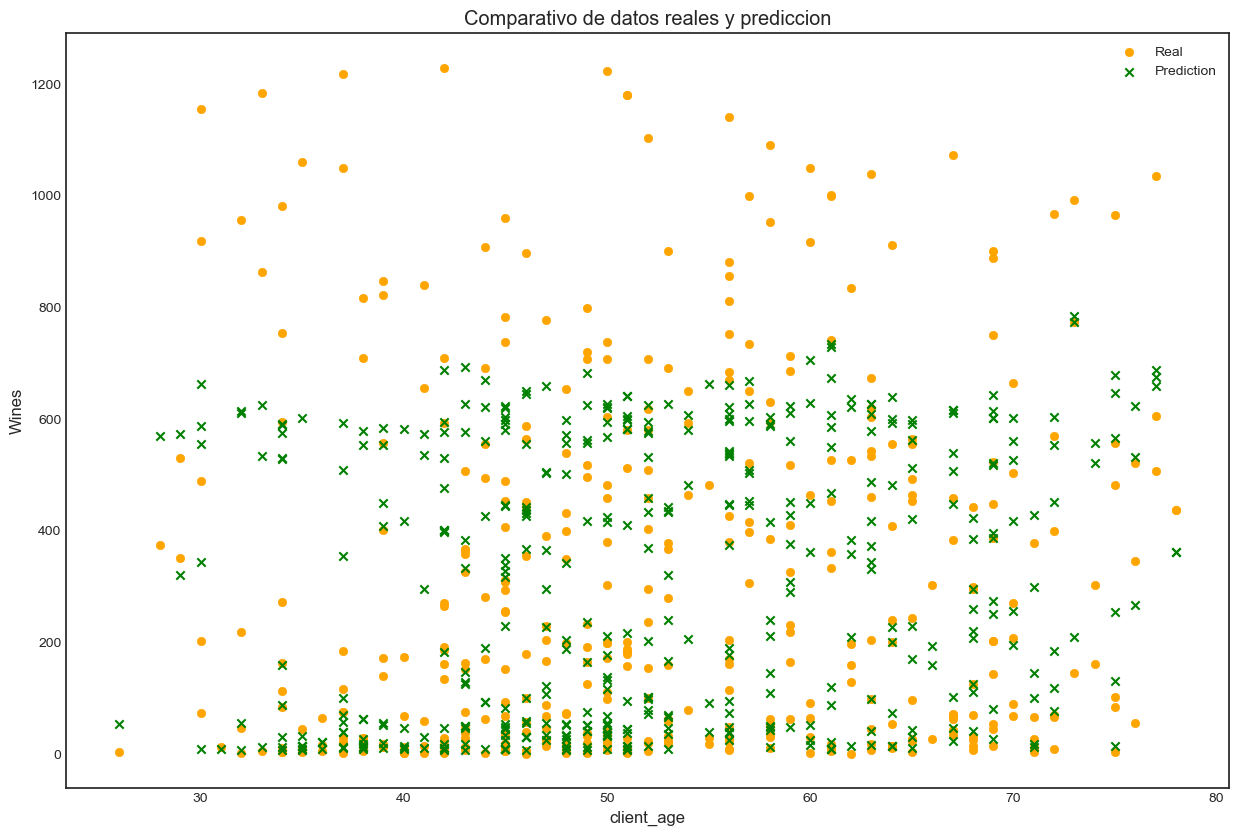

In [52]:
# Comparar valores reales contra predicciones
# Plot
plt.rcParams.update({"figure.figsize":(15,10),"figure.dpi":100})
plt.scatter(compare["client_age"],compare["y_test"],color="orange",marker="o",label="Real")
plt.scatter(compare["client_age"],compare["y_pred"],color="green",marker="x",label="Prediction")
# Labels
plt.title("Comparativo de datos reales y prediccion")
plt.xlabel("client_age")
plt.ylabel('Wines')
plt.legend(loc='best')
plt.show()

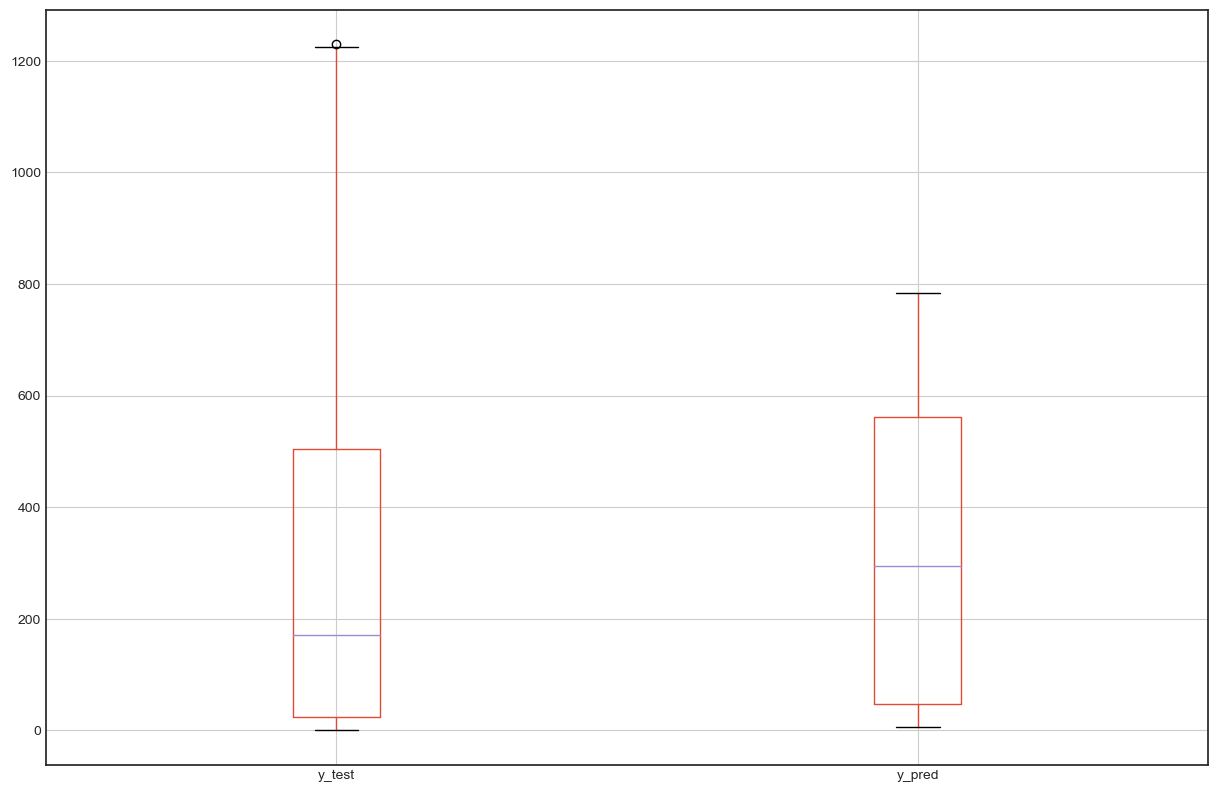

In [53]:
# Boxplot
compare.boxplot(column=["y_test","y_pred"]);

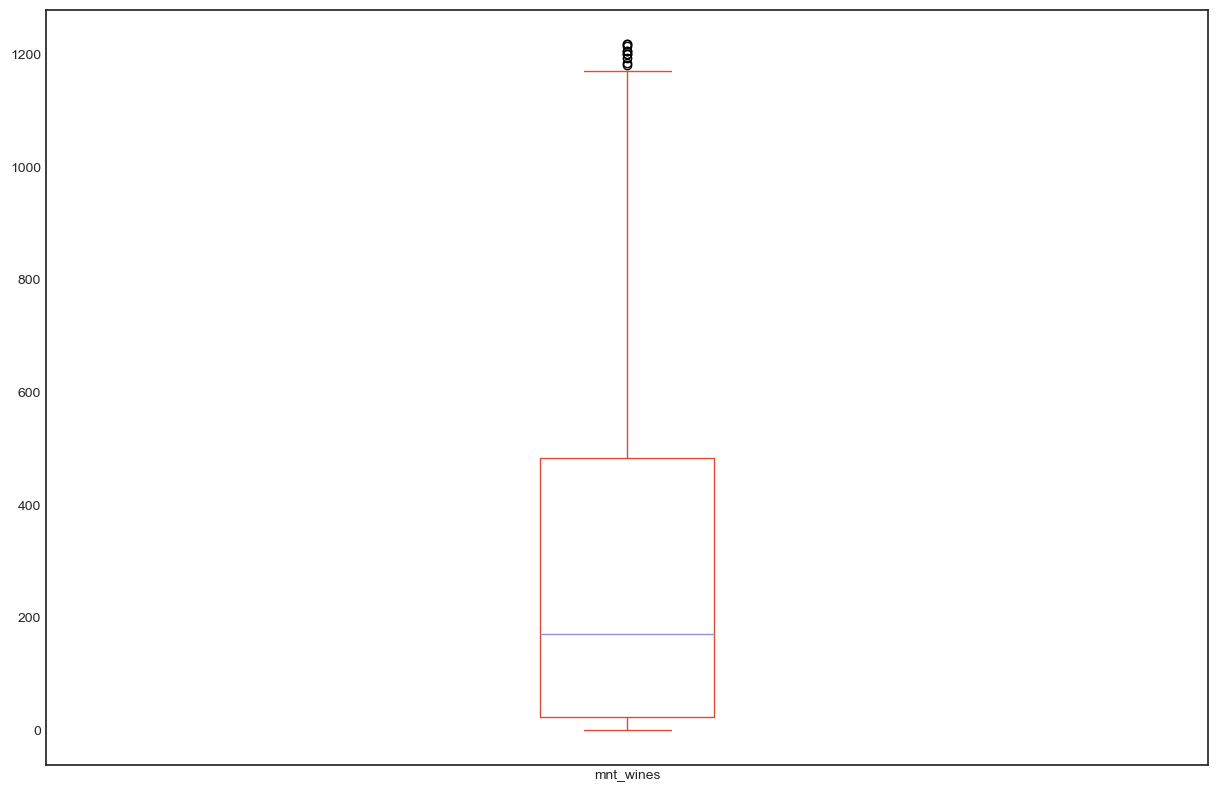

In [54]:
y_train.plot.box();

# Borrar esta seccion antes de la presentacion
Para proyectos de clasificación o regresión:  
* 20% --> Se hizo un train y test set
* 20% --> Las variables predictoras están correctamente preprocesadas
* 20% --> El modelo que se usó se entrenó exitosamente
* 20% --> El modelo NO está sobreajustado
* 20% --> Las métricas de evaluación fueron correctamente elegidas e interpretadas